In [168]:
#import pandas e matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import statistics
from pandas._libs.hashtable import value_count
from statistics import mean 
from scipy import stats


In [169]:
#importando a base de dados
data1AW = pd.read_excel("/content/AdventureWorks.xlsx")
#
data2GM = pd.read_csv("/content/Gapminder.csv", error_bad_lines=False, sep=";")
#
df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

In [170]:
data2GM = data2GM.rename(columns={"country":"Pais", "continent":"Continente", "year":"Ano", "lifeExp":"ExpecVida", "pop":"Populacao", "gdpPercap":"PIB per Capita" })

In [171]:
# Verificando campos nulos
print(data2GM.isna().sum())
# Verificando a consistência dos dados
print(data2GM.describe(include = 'all'))
# Verificando dados únicos
print(data2GM.nunique().sort_values())
# Removendo as linhas com valores duplicados
data2GM = data2GM.drop_duplicates()
print(data2GM)

Pais                0
Continente        301
Ano                 0
ExpecVida           0
Populacao           0
PIB per Capita      0
dtype: int64
         Pais Continente                  Ano            ExpecVida  \
count    3312       3011                3,312                3,312   
unique    187          6                  NaN                  NaN   
top     Spain     Europe                  NaN                  NaN   
freq       58       1302                  NaN                  NaN   
mean      NaN        NaN                1,980                   65   
std       NaN        NaN                   17                   12   
min       NaN        NaN                1,950                   24   
25%       NaN        NaN                1,967                   58   
50%       NaN        NaN                1,982                   70   
75%       NaN        NaN                1,996                   74   
max       NaN        NaN                2,007                   83   

              

In [172]:
#Acrescentando uma coluna calculada a planilha
data2GM["PIB"] = data2GM["PIB per Capita"].mul(data2GM["Populacao"])
#Ajustando a apresentação dos dados de float muito grandes
pd.options.display.float_format="{:20,.0f}".format
pd.set_option('display.max_columns', 30)
warnings.filterwarnings('ignore')
#data2_GM.head()
data2GM["Ano"] = pd.to_datetime(data2GM["Ano"], format='%Y')
data2GM['Ano'] = pd.DatetimeIndex(data2GM["Ano"]).year
#data2_GM.dtypes
data2GM.describe()

,Ano,ExpecVida,Populacao,PIB per Capita,PIB
count,"3,312","3,312","3,312","3,312","3,312"
mean,"1,980",65,"31,614,891","11,317","304,922,654,087"
std,17,12,"104,119,343","11,369","981,982,327,978"
min,"1,950",24,"59,412",241,"52,784,691"
25%,"1,967",58,"2,678,572","2,515","8,988,503,786"
50%,"1,982",70,"7,557,218","7,839","49,817,768,152"
75%,"1,996",74,"19,585,222","17,358","185,359,011,956"
max,"2,007",83,"1,318,683,096","113,523","12,934,458,535,085"


In [173]:
data2GM['Ano'].describe()

count                  3,312
mean                   1,980
std                       17
min                    1,950
25%                    1,967
50%                    1,982
75%                    1,996
max                    2,007
Name: Ano, dtype: float64

In [174]:
data2GM.mean()

Ano                             1,980
ExpecVida                          65
Populacao                  31,614,891
PIB per Capita                 11,317
PIB                   304,922,654,087
dtype: float64

In [175]:
data2GM["PIB"].mean()

304922654086.72473

In [176]:
data2GM.groupby(['Ano'])['PIB'].mean()

Ano
1950        133,792,131,625
1951        161,864,560,145
1952         47,687,507,974
1953        187,910,405,783
1954        191,507,388,139
1955        204,526,930,011
1956        212,521,496,728
1957         61,815,811,187
1958        220,924,051,251
1959        233,505,329,556
1960        234,209,774,439
1961        241,796,606,178
1962         72,972,332,578
1963        269,355,145,985
1964        287,781,497,090
1965        293,945,402,900
1966        313,224,463,098
1967         91,628,783,039
1968        343,598,498,256
1969        362,584,454,977
1970        377,162,808,455
1971        392,312,299,672
1972        110,232,521,263
1973        428,678,440,666
1974        445,255,225,543
1975        449,194,567,502
1976        469,052,607,074
1977        131,432,027,059
1978        511,102,530,154
1979        530,796,858,586
1980        538,391,984,750
1981        550,141,265,017
1982        149,592,415,259
1983        534,567,114,213
1984        562,246,900,463
1985        582,

In [177]:
data2GM = data2GM.sort_values("Ano", ascending=True).reset_index(drop=True)
data2GM

,Pais,Continente,Ano,ExpecVida,Populacao,PIB per Capita,PIB
0,Greece,Europe,1950,66,7566028,"3,293","24,915,193,297"
1,Portugal,Europe,1950,59,8442750,"2,962","25,006,502,336"
2,Sri Lanka,Asia,1950,56,7533097,"1,033","7,785,448,262"
3,Russia,FSU,1950,57,101936816,"3,675","374,612,976,271"
4,Belize,NaN,1950,58,65797,"1,731","113,903,340"
...,...,...,...,...,...,...,...
3307,Mauritania,Africa,2007,64,3270065,"1,803","5,896,422,597"
3308,Mauritius,Africa,2007,73,1250882,"10,957","13,705,902,966"
3309,Mexico,Americas,2007,76,108700891,"11,978","1,301,973,070,171"
3310,Mali,Africa,2007,54,12031795,"1,043","12,544,127,565"


In [178]:
data2GM.groupby(['Ano']).mean()['PIB per Capita']

Ano
1950                  5,788
1951                  7,167
1952                  3,801
1953                  7,286
1954                  7,559
1955                  7,906
1956                  8,147
1957                  4,359
1958                  8,329
1959                  8,637
1960                  9,311
1961                  9,657
1962                  4,771
1963                 10,303
1964                 10,880
1965                 11,009
1966                 11,408
1967                  5,641
1968                 12,095
1969                 12,717
1970                 13,193
1971                 13,654
1972                  7,612
1973                 13,910
1974                 15,255
1975                 15,175
1976                 15,647
1977                  8,411
1978                 16,385
1979                 16,882
1980                 17,199
1981                 17,324
1982                  8,553
1983                 18,293
1984                 18,936
1985            

In [179]:
statistics.mean(data2GM.groupby(['Ano']).mean()['PIB'])

435285011494.7465

In [180]:
df =data2GM
df['rankMaior'] = df.groupby(['Ano'])['PIB'].rank("dense", ascending=False)
df['rankMenor'] = df.groupby(['Ano'])['PIB'].rank("dense", ascending=True)
df = df.sort_values(by=["Ano", "rankMenor"], ascending=True).reset_index(drop=True)
df

,Pais,Continente,Ano,ExpecVida,Populacao,PIB per Capita,PIB,rankMaior,rankMenor
0,Belize,NaN,1950,58,65797,"1,731","113,903,340",39,1
1,Iceland,Europe,1950,71,142938,"7,750","1,107,811,171",38,2
2,Libya,Africa,1950,43,961305,"2,084","2,003,632,124",37,3
3,Costa Rica,Americas,1950,56,866982,"2,440","2,115,281,354",36,4
4,Uganda,Africa,1950,40,5521758,760,"4,195,872,440",35,5
...,...,...,...,...,...,...,...,...,...
3307,Germany,Europe,2007,79,82400996,"32,170","2,650,870,893,901",5,179
3308,India,Asia,2007,65,1110396331,"2,452","2,722,925,438,773",4,180
3309,Japan,Asia,2007,83,127467972,"31,656","4,035,134,797,102",3,181
3310,China,Asia,2007,73,1318683096,"4,959","6,539,500,929,092",2,182


In [181]:
df.nlargest(10, "PIB").mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of                Pais Continente   Ano            ExpecVida  Populacao  \
3311  United States   Americas  2007                   78  301139947   
3110  United States   Americas  2005                   78  295734134   
3080  United States   Americas  2004                   78  293027571   
3048  United States   Americas  2003                   77  290342554   
3015  United States   Americas  2002                   77  287675526   
2828  United States   Americas  2001                   77  285023886   
2795  United States   Americas  2000                   77  282338631   
2762  United States   Americas  1999                   77  279294713   
2729  United States   Americas  1998                   77  276115288   
2696  United States   Americas  1997                   77  272911760   

           PIB per Capita                  PIB            rankMaior  \
3311               42,952   12,934,458,535,085                    1   
31

In [182]:
dfMAIORES = (df[df.rankMaior<5])
dfMAIORES.groupby(['Ano'])['PIB'].head()

35          374,612,976,271
36          416,403,482,369
37          489,565,533,627
38        1,967,681,539,095
59          223,795,735,743
               ...         
3128      3,951,590,919,660
3308      2,722,925,438,773
3309      4,035,134,797,102
3310      6,539,500,929,092
3311     12,934,458,535,085
Name: PIB, Length: 232, dtype: float64

In [183]:
dfMENORES = (df[df.rankMenor<5])
dfMENORES.groupby(['Ano']).mean()['PIB'].head(10)

Ano
1950          1,335,156,997
1951         10,679,032,504
1952             91,113,077
1953         12,580,353,072
1954         13,013,028,820
1955         14,093,827,897
1956         14,635,493,558
1957            106,285,246
1958         17,108,977,138
1959         18,249,348,437
Name: PIB, dtype: float64

In [184]:
df.groupby(['Ano'])['PIB'].mean()

Ano
1950        133,792,131,625
1951        161,864,560,145
1952         47,687,507,974
1953        187,910,405,783
1954        191,507,388,139
1955        204,526,930,011
1956        212,521,496,728
1957         61,815,811,187
1958        220,924,051,251
1959        233,505,329,556
1960        234,209,774,439
1961        241,796,606,178
1962         72,972,332,578
1963        269,355,145,985
1964        287,781,497,090
1965        293,945,402,900
1966        313,224,463,098
1967         91,628,783,039
1968        343,598,498,256
1969        362,584,454,977
1970        377,162,808,455
1971        392,312,299,672
1972        110,232,521,263
1973        428,678,440,666
1974        445,255,225,543
1975        449,194,567,502
1976        469,052,607,074
1977        131,432,027,059
1978        511,102,530,154
1979        530,796,858,586
1980        538,391,984,750
1981        550,141,265,017
1982        149,592,415,259
1983        534,567,114,213
1984        562,246,900,463
1985        582,

In [185]:
print(data2GM[data2GM["Pais"] == "Libya"])
print(np.mean(data2GM[data2GM["Pais"] == "Libya"]))

       Pais Continente   Ano            ExpecVida  Populacao  \
14    Libya     Africa  1950                   43     961305   
167   Libya     Africa  1952                   43    1019729   
409   Libya     Africa  1957                   45    1201578   
555   Libya     Africa  1962                   48    1441863   
950   Libya     Africa  1967                   50    1759224   
1168  Libya     Africa  1972                   53    2183877   
1396  Libya     Africa  1977                   57    2721783   
1636  Libya     Africa  1982                   62    3344074   
2007  Libya     Africa  1987                   66    3799845   
2379  Libya     Africa  1992                   69    4364501   
2561  Libya     Africa  1997                   72    4759670   
2988  Libya     Africa  2002                   73    5368585   
3247  Libya     Africa  2007                   74    6036914   

           PIB per Capita                  PIB            rankMaior  \
14                  2,084       

In [186]:
for Ano in data2GM["Ano"].unique() : print(data2GM.groupby(by = ['Ano','Continente', 'Pais'])['PIB per Capita'].mean())

Ano   Continente  Pais           
1950  Africa      Libya                            2,084
                  Uganda                             760
      Americas    Costa Rica                       2,440
                  Cuba                             5,180
                  Mexico                           3,294
                                            ...         
2007  FSU         Russia                          13,821
                  Ukraine                          6,549
      Oceania     Fiji                             4,118
                  New Zealand                     25,185
                  Solomon Islands                  1,829
Name: PIB per Capita, Length: 3011, dtype: float64
Ano   Continente  Pais           
1950  Africa      Libya                            2,084
                  Uganda                             760
      Americas    Costa Rica                       2,440
                  Cuba                             5,180
                  Mexico  

In [187]:
print(data2GM["Ano"].unique())
print(data2GM.query("Ano").mean())

[1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963
 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977
 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991
 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007]
Ano                             1,987
ExpecVida                          64
Populacao                  24,263,977
PIB per Capita                  8,856
PIB                   190,707,750,572
rankMaior                          76
rankMenor                          96
dtype: float64


#2° Conjunto de Dados

In [188]:
#juntando todos os arquivos
dfExcel = pd.concat([df1,df2,df3,df4,df5])
dfExcel

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142,1520,1
1,Aracaju,2018-01-01,14,1522,6
2,Aracaju,2018-01-01,72,1520,1
3,Aracaju,2018-01-01,3,1521,7
4,Aracaju,2018-01-01,25,1522,8
...,...,...,...,...,...
235,Salvador,2019-01-03,42,1034,1
236,Salvador,2019-01-03,126,1035,3
237,Salvador,2019-01-03,38,1036,3
238,Salvador,2019-01-03,140,1035,1


In [189]:
dfExcel["LojaID"] = dfExcel["LojaID"].astype("object")
dfExcel.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [190]:
#Vericando a consistência dos dados
print(dfExcel.isna().sum())
print(dfExcel.isnull().sum())

print(dfExcel.describe(include = 'all'))

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64
Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64
       Cidade                 Data               Vendas               LojaID  \
count     894                  894                  894                  894   
unique      5                   76                  NaN                   19   
top     Natal  2019-01-01 00:00:00                  NaN                1,036   
freq      240                  300                  NaN                  117   
first     NaN  2018-01-01 00:00:00                  NaN                  NaN   
last      NaN  2019-04-05 00:00:00                  NaN                  NaN   
mean      NaN                  NaN                  123                  NaN   
std       NaN                  NaN                  167                  NaN   
min       NaN                  NaN                    3                  NaN   
25%       NaN                  NaN                   2

In [191]:
print(dfExcel.nunique().sort_values())

dfExcel["Vendas"].fillna(dfExcel["Vendas"].mean(), inplace=True)
print(dfExcel)

Cidade      5
Qtde       10
LojaID     19
Data       76
Vendas    679
dtype: int64
       Cidade       Data               Vendas LojaID  Qtde
0     Aracaju 2018-01-01                  142   1520     1
1     Aracaju 2018-01-01                   14   1522     6
2     Aracaju 2018-01-01                   72   1520     1
3     Aracaju 2018-01-01                    3   1521     7
4     Aracaju 2018-01-01                   25   1522     8
..        ...        ...                  ...    ...   ...
235  Salvador 2019-01-03                   42   1034     1
236  Salvador 2019-01-03                  126   1035     3
237  Salvador 2019-01-03                   38   1036     3
238  Salvador 2019-01-03                  140   1035     1
239  Salvador 2019-01-03                  161   1037     3

[894 rows x 5 columns]


In [192]:
dfExcel["Vendas"].mean()

122.61180089485458

In [193]:
dfExcel["Receita"] = dfExcel["Vendas"].mul(dfExcel["Qtde"])
dfExcel["Receita/Vendas"] = dfExcel["Receita"] / dfExcel["Vendas"] 

In [194]:
print(dfExcel["Receita"].max())
print(dfExcel["Receita"].min())

3544.0
3.34


In [195]:
print(dfExcel.nlargest(3, "Receita"))
print(dfExcel.nsmallest(3, "Receita"))

   Cidade       Data               Vendas LojaID  Qtde              Receita  \
7   Natal 2019-03-18                  886    853     4                3,544   
51  Natal 2018-01-21                  859    852     4                3,436   
55  Natal 2019-01-08                  859    854     4                3,436   

         Receita/Vendas  
7                     4  
51                    4  
55                    4  
      Cidade       Data               Vendas LojaID  Qtde  \
118  Aracaju 2018-01-01                    3   1522     1   
65    Recife 2019-01-01                    4    981     1   
92     Natal 2019-01-02                    5   1035     1   

                 Receita       Receita/Vendas  
118                    3                    1  
65                     4                    1  
92                     5                    1  


In [196]:
dfExcel.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju                   48,748
Fortaleza                 37,914
Natal                    167,228
Recife                    51,937
Salvador                  40,597
Name: Receita, dtype: float64

In [197]:
dfExcel.sort_values("Receita", ascending=False).head(8)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886,853,4,"3,544",4
55,Natal,2019-01-08,859,854,4,"3,436",4
51,Natal,2018-01-21,859,852,4,"3,436",4
30,Natal,2018-10-02,856,853,4,"3,424",4
41,Natal,2018-05-20,835,852,4,"3,340",4
38,Natal,2018-02-25,828,852,4,"3,312",4
10,Natal,2018-10-27,828,852,4,"3,312",4
69,Natal,2019-03-24,817,852,4,"3,268",4


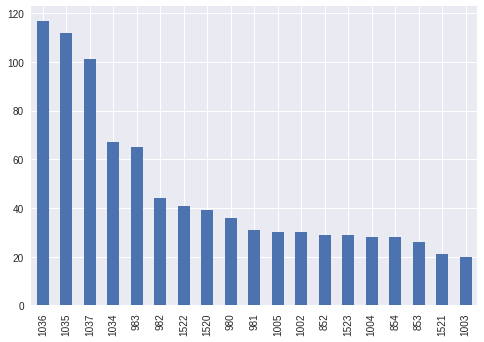

In [198]:
dfExcel["LojaID"].value_counts(ascending=False).plot.bar();

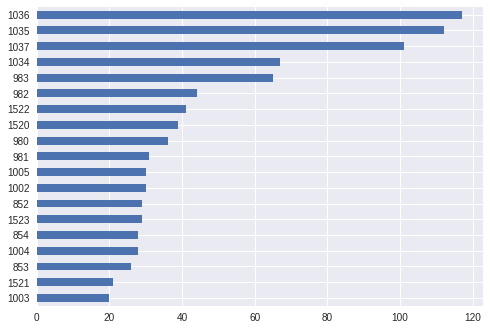

In [199]:
dfExcel["LojaID"].value_counts(ascending=True).plot.barh();

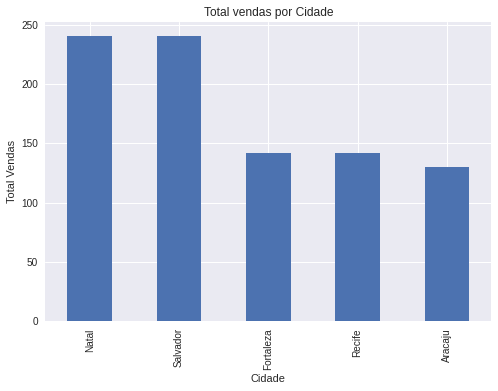

In [200]:
dfExcel["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

In [201]:
dfExcel["Data"] = dfExcel["Data"].astype("int64")
dfExcel["Data"] = pd.to_datetime(dfExcel["Data"])
dfExcel["Ano_Venda"] = dfExcel["Data"].dt.year
dfExcel["mes_venda"], dfExcel["dia_venda"] = (dfExcel["Data"].dt.month, dfExcel["Data"].dt.day)

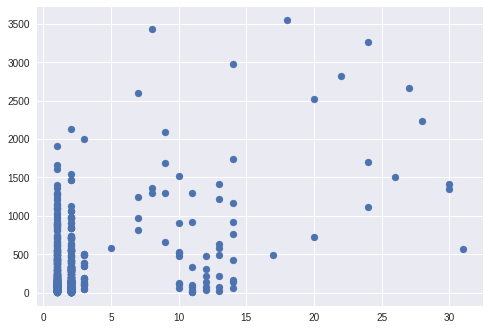

In [202]:
dfExcel_2019 = dfExcel[dfExcel["Ano_Venda"] == 2019]
plt.scatter(x=dfExcel_2019["dia_venda"], y = dfExcel_2019["Receita"]);

#3° Conjunto de Dados

In [203]:
plt.style.use("seaborn")
data1AW

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,349,758,6,0,"4,548",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,349,758,6,0,"4,548",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,349,758,6,0,"4,548",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,349,758,6,0,"4,548",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,349,758,6,0,"4,548",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899,2008-03-22,2008-04-04,306,1226,19049,200803224CS555,331,999,6,420,"5,574",Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black
900,2008-10-04,2008-10-15,306,1155,19057,200810044CS636,325,980,6,"1,176","4,704",Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black
901,2008-12-11,2008-12-15,306,1155,19060,200812114CS676,325,980,6,"1,176","4,704",Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black
902,2008-12-17,2008-12-21,306,1226,19060,200812174CS676,331,999,6,"1,199","4,795",Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black


In [204]:
data1AW["custo"] = data1AW["Custo Unitário"].mul(data1AW["Quantidade"])
round(data1AW["custo"].sum(), 2)
data1AW["lucro"]  = data1AW["Valor Venda"] - data1AW["custo"]
round(data1AW["lucro"].sum(), 2)
data1AW["Tempo_envio"] = data1AW["Data Envio"] - data1AW["Data Venda"]
data1AW["Tempo_envio"] = (data1AW["Data Envio"] - data1AW["Data Venda"]).dt.days
data1AW.groupby("Marca")["Tempo_envio"].mean()

Marca
Adventure Works                      9
Contoso                              8
Fabrikam                             9
Name: Tempo_envio, dtype: float64

In [205]:
data1AW.isnull().sum()
data1AW.groupby([data1AW["Data Venda"].dt.year, "Marca"])["lucro"].sum()

Data Venda  Marca          
2008        Adventure Works                306,641
            Contoso                         56,416
            Fabrikam                     1,557,021
2009        Adventure Works                405,395
            Contoso                        138,259
            Fabrikam                     1,034,091
Name: lucro, dtype: float64

In [206]:
lucro_ano = data1AW.groupby([data1AW["Data Venda"].dt.year, "Marca"])["lucro"].sum().reset_index()
lucro_ano

,Data Venda,Marca,lucro
0,2008,Adventure Works,"306,641"
1,2008,Contoso,"56,416"
2,2008,Fabrikam,"1,557,021"
3,2009,Adventure Works,"405,395"
4,2009,Contoso,"138,259"
5,2009,Fabrikam,"1,034,091"


In [207]:
data1AW.groupby("Produto")["Quantidade"].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

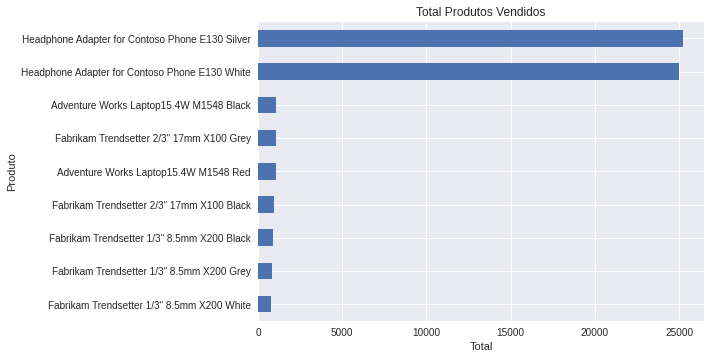

In [208]:
data1AW.groupby("Produto")["Quantidade"].sum().sort_values(ascending=True).plot.barh(title="Total Produtos Vendidos")
plt.xlabel("Total")
plt.ylabel("Produto");

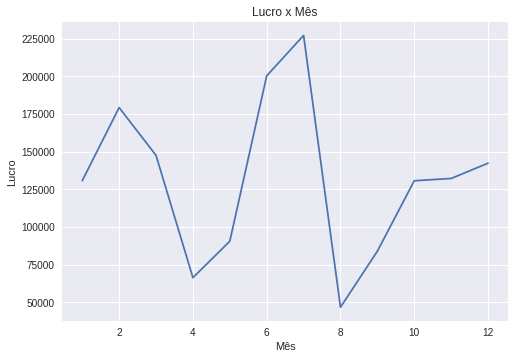

In [209]:
df_2009 = data1AW[data1AW["Data Venda"].dt.year == 2009]
df_2009.groupby(df_2009["Data Venda"].dt.month)["lucro"].sum().plot(title="Lucro x Mês")
plt.xlabel("Mês")
plt.ylabel("Lucro");

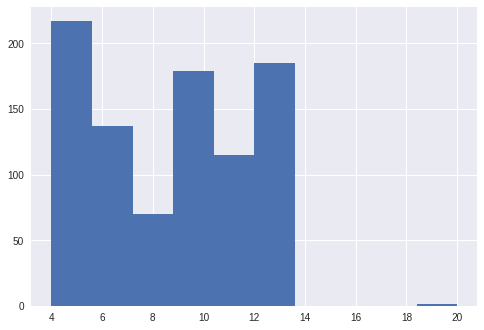

In [210]:
plt.hist(data1AW["Tempo_envio"]);

In [211]:
print(data1AW["Tempo_envio"].min())
print(data1AW['Tempo_envio'].max())

4
20


In [212]:
data1AW[data1AW["Tempo_envio"] == 20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,349,758,6,0,"4,548",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091","2,457",20


In [213]:
data1AW.to_csv("df_vendas_novo.csv", index=False)